In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 40

In [2]:
df = pd.read_csv('../Assets/Datasets/BTS_flight_data/non_cancelled_departures.csv')
print df.shape

(2104626, 35)


In [3]:
# remove flights that weren't cancelled and have no arrival time or actual elapsed time (diverted?)
diverted = df[((df['CANCELLED'] == 0) & 
         ((df['ARR_TIME'].isnull() == True) | (df['ACTUAL_ELAPSED_TIME'].isnull() == True)))]
print 'diverted', diverted.shape

df = df[~((df['CANCELLED'] == 0) & 
         ((df['ARR_TIME'].isnull() == True) | (df['ACTUAL_ELAPSED_TIME'].isnull() == True)))]

print 'departures', df.shape

diverted (5340, 35)
departures (2099286, 35)


In [4]:
# Replace CANCELLATION CODE nulls with 'N'
df['CANCELLATION_CODE'].fillna('N', inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0                     0
YEAR                           0
MONTH                          0
DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
FL_DATE                        0
UNIQUE_CARRIER                 0
TAIL_NUM                       0
FL_NUM                         0
ORIGIN_AIRPORT_ID              0
ORIGIN_CITY_MARKET_ID          0
DEST_AIRPORT_ID                0
DEST_CITY_MARKET_ID            0
CRS_DEP_TIME                   0
DEP_TIME                       0
DEP_DELAY_NEW                  0
TAXI_OUT                       0
WHEELS_OFF                     0
WHEELS_ON                      0
TAXI_IN                        0
CRS_ARR_TIME                   0
ARR_TIME                       0
ARR_DELAY_NEW                  0
CANCELLED                      0
CANCELLATION_CODE              0
CRS_ELAPSED_TIME               0
ACTUAL_ELAPSED_TIME            0
AIR_TIME                       0
FLIGHTS                        0
DISTANCE                       0
CARRIER_DE

In [6]:
# Replace nulls in delay columns with 0
df.fillna(value=0, inplace=True)


# Create Unknown_Delay column
df['UNKNOWN_DELAY'] = df['DEP_DELAY_NEW'] - (df['CARRIER_DELAY'] + df['WEATHER_DELAY'] +df['NAS_DELAY'] + 
                                             df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

In [7]:
df.isnull().sum()

Unnamed: 0               0
YEAR                     0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
FL_DATE                  0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN_CITY_MARKET_ID    0
DEST_AIRPORT_ID          0
DEST_CITY_MARKET_ID      0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DELAY_NEW            0
TAXI_OUT                 0
WHEELS_OFF               0
WHEELS_ON                0
TAXI_IN                  0
CRS_ARR_TIME             0
ARR_TIME                 0
ARR_DELAY_NEW            0
CANCELLED                0
CANCELLATION_CODE        0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME      0
AIR_TIME                 0
FLIGHTS                  0
DISTANCE                 0
CARRIER_DELAY            0
WEATHER_DELAY            0
NAS_DELAY                0
SECURITY_DELAY           0
LATE_AIRCRAFT_DELAY      0
UNKNOWN_DELAY            0
dtype: int64

In [8]:
df['DEP_DELAY_NEW'].describe()

count    2.099286e+06
mean     1.567658e+01
std      3.605158e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+01
max      1.258000e+03
Name: DEP_DELAY_NEW, dtype: float64

In [9]:
mdw = df[df['ORIGIN_AIRPORT_ID'] == 13232]
ohare = df[df['ORIGIN_AIRPORT_ID'] != 13232]

In [11]:
df['MONTH_DAY'] = df['MONTH'].astype(str) + '-' + df['DAY_OF_MONTH'].astype(str)

In [13]:
# flights/day/airport
flight_count = df.groupby(['ORIGIN_AIRPORT_ID', 'FL_DATE'])['DEP_DELAY_NEW'].agg([np.mean, len]).reset_index()
mdw_flight_count = flight_count[flight_count['ORIGIN_AIRPORT_ID'] == 13232]
ord_flight_count = flight_count[flight_count['ORIGIN_AIRPORT_ID'] != 13232]

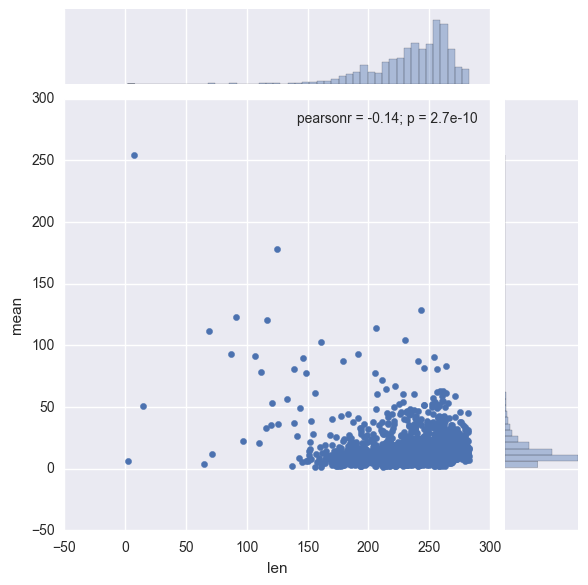

In [14]:
sns.jointplot('len', 'mean', data=mdw_flight_count)

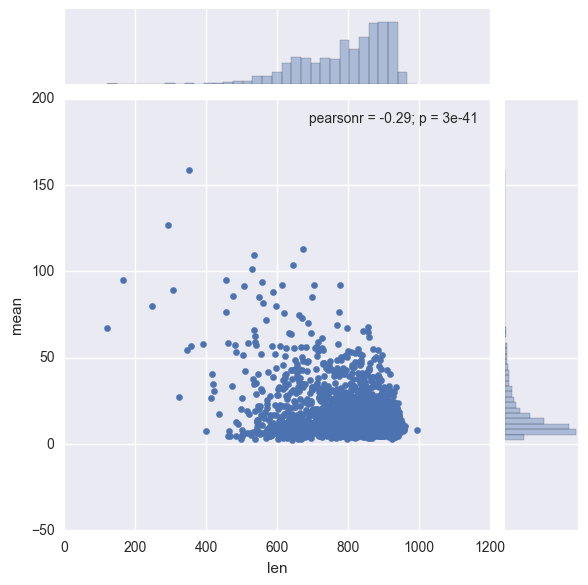

In [15]:
sns.jointplot('len', 'mean', data=ord_flight_count)

In [16]:
mdw['UNIQUE_CARRIER'].value_counts()

WN    440900
FL     15327
DL     13540
F9      5253
EV      3859
9E      2166
OO       964
Name: UNIQUE_CARRIER, dtype: int64

In [17]:
ohare['UNIQUE_CARRIER'].value_counts()

MQ    369433
UA    332599
AA    289858
EV    237103
OO    180790
XE     45932
DL     36714
US     31686
YV     27782
NK     16890
B6     12201
AS      9784
F9      8304
VX      7579
CO      7577
9E      3045
Name: UNIQUE_CARRIER, dtype: int64

In [21]:
mdw.iloc[:, -6:].mean()

CARRIER_DELAY          3.933686
WEATHER_DELAY          0.632484
NAS_DELAY              1.991820
SECURITY_DELAY         0.007869
LATE_AIRCRAFT_DELAY    5.322179
UNKNOWN_DELAY          2.911130
dtype: float64

In [22]:
ohare.iloc[:, -6:].mean()

CARRIER_DELAY          4.626509
WEATHER_DELAY          1.161236
NAS_DELAY              3.561446
SECURITY_DELAY         0.006547
LATE_AIRCRAFT_DELAY    6.058961
UNKNOWN_DELAY          0.523378
dtype: float64